In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import neurokit2 as nk
from IPython.display import clear_output

sys.path.append('..')
from util import standardize, normalize, load_base_data, write_json, load_json

import warnings
warnings.simplefilter("ignore")

plt.rcParams['figure.figsize'] = [20, 5]

In [2]:
DATA_PATH = "data"
SAMPLING_RATE = 300

In [4]:
X_train, y_train, X_test = load_base_data(DATA_PATH)

In [ ]:
problematic_train = []
for i in tqdm(range(len(X_train))):
    signal = X_train.loc[i].dropna().to_numpy(dtype='float32')
    signal = normalize(signal)
    flipped_signal = 1 - signal

    # Try doing r peak detection on the original signal
    try:
        signals, info = nk.ecg_process(signal, sampling_rate=SAMPLING_RATE)
        r_peaks = info["ECG_R_Peaks"]
        rr_intervals = r_peaks[1:]-r_peaks[:-1]
    except:
        problematic_train.append(i)
        continue
    
    # Try doing r peak detection on the flipped signal
    try:
        signals, info = nk.ecg_process(flipped_signal, sampling_rate=SAMPLING_RATE)
        r_peaks = info["ECG_R_Peaks"]
        flipped_rr_intervals = r_peaks[1:]-r_peaks[:-1]
    except:
        pass

    if np.mean(flipped_rr_intervals) < np.mean(rr_intervals):
        problematic_train.append(i)
    
print(problematic_train)
write_json(problematic_train, 'outliers/train/problematic_initial.json')

In [32]:
problematic_test = []
for i in tqdm(range(len(X_test))):
    signal = X_test.loc[i].dropna().to_numpy(dtype='float32')
    signal = normalize(signal)
    flipped_signal = 1 - signal

    # Try doing r peak detection on the original signal
    try:
        signals, info = nk.ecg_process(signal, sampling_rate=SAMPLING_RATE)
        r_peaks = info["ECG_R_Peaks"]
        rr_intervals = r_peaks[1:]-r_peaks[:-1]
    except:
        problematic_test.append(i)
        continue
    
    # Try doing r peak detection on the flipped signal
    try:
        signals, info = nk.ecg_process(flipped_signal, sampling_rate=SAMPLING_RATE)
        r_peaks = info["ECG_R_Peaks"]
        flipped_rr_intervals = r_peaks[1:]-r_peaks[:-1]
    except:
        pass

    if np.mean(flipped_rr_intervals) < np.mean(rr_intervals):
        problematic_test.append(i)
    
print(problematic_test)
write_json(problematic_test, 'outliers/test/problematic_initial.json')

100%|██████████| 3411/3411 [25:53<00:00,  2.20it/s]

[4, 5, 12, 16, 20, 28, 30, 31, 34, 36, 44, 45, 46, 47, 49, 51, 54, 55, 56, 57, 68, 69, 70, 71, 76, 77, 84, 87, 90, 93, 94, 95, 100, 102, 119, 121, 122, 123, 125, 128, 131, 132, 135, 136, 138, 139, 141, 143, 146, 149, 151, 152, 155, 159, 161, 165, 167, 169, 170, 173, 184, 186, 188, 194, 198, 200, 205, 207, 208, 210, 213, 219, 227, 229, 230, 231, 234, 235, 237, 242, 251, 252, 254, 256, 260, 269, 270, 275, 276, 280, 288, 290, 293, 294, 295, 296, 297, 299, 304, 306, 314, 315, 316, 318, 320, 322, 324, 325, 328, 331, 332, 334, 336, 338, 340, 342, 343, 347, 351, 360, 364, 365, 367, 376, 378, 379, 382, 386, 387, 389, 394, 396, 397, 404, 405, 406, 413, 416, 422, 426, 429, 430, 435, 437, 438, 443, 453, 462, 463, 467, 468, 469, 471, 472, 477, 479, 485, 488, 489, 490, 495, 500, 502, 505, 514, 518, 520, 521, 530, 531, 535, 536, 538, 539, 542, 544, 545, 548, 550, 555, 558, 561, 562, 563, 565, 569, 574, 583, 584, 585, 588, 589, 590, 592, 593, 596, 598, 599, 604, 605, 607, 609, 611, 618, 620, 621, 629

## Manually annotate problematic signals

### Train set

In [5]:
flipped = []
not_flipped = []

In [ ]:
problematic_train = load_json('outliers/train/problematic_initial.json')
flipped = load_json('outliers/train/flipped.json')
not_flipped = load_json('outliers/train/not_flipped.json')

for i in problematic_train:
    if i in flipped or i in not_flipped:
        continue

    print(i)
    signal = X_train.loc[i].dropna().to_numpy(dtype='float32')
    signal = normalize(signal)

    plt.plot(signal[1000:3000])
    plt.show()

    choice = ''
    while choice not in ['y', 'n']:
        choice = input()
        if choice == 'y':
            flipped.append(i)
        elif choice == 'n':
            not_flipped.append(i)

    clear_output(wait=True)
    write_json(flipped, 'outliers/train/flipped.json')
    write_json(not_flipped, 'outliers/train/not_flipped.json')

### Test set

In [33]:
test_flipped = []
test_not_flipped = []

3409


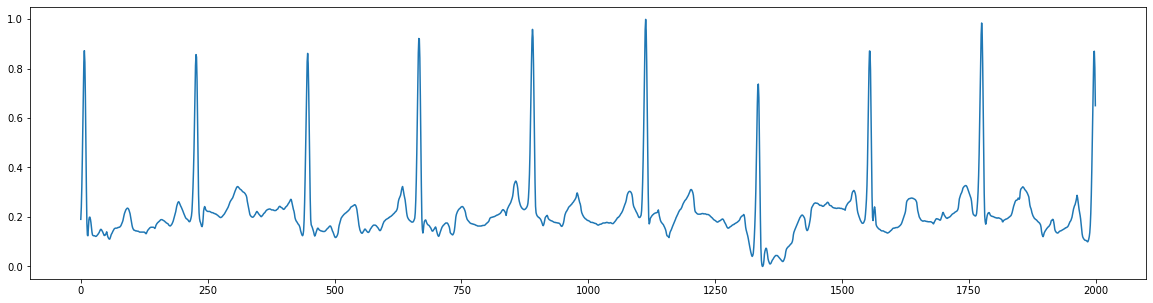

In [35]:
problematic_test = load_json('outliers/test/problematic_initial.json')

for i in problematic_test:
    if i in test_flipped or i in test_not_flipped:
        continue

    print(i)
    signal = X_test.loc[i].dropna().to_numpy(dtype='float32')
    signal = normalize(signal)
    

    plt.plot(signal[1000:3000])
    plt.show()

    choice = ''
    while choice not in ['y', 'n']:
        choice = input()
        if choice == 'y':
            test_flipped.append(i)
        elif choice == 'n':
            test_not_flipped.append(i)

    clear_output(wait=True)
    write_json(test_flipped, 'outliers/test/flipped.json')
    write_json(test_not_flipped, 'outliers/test/not_flipped.json')